**Scenario:**

A coffee shop claims their average serving temperature is $75°C$
- $H₀: μ = 75°C$ (null hypothesis)
- $H₁: μ ≠ 75°C$ (alternative hypothesis)
We take 36 measurements and find $x̄ = 77°C$ with $σ = 6°C$

Z-statistic: 2.00
P-value: 0.0455


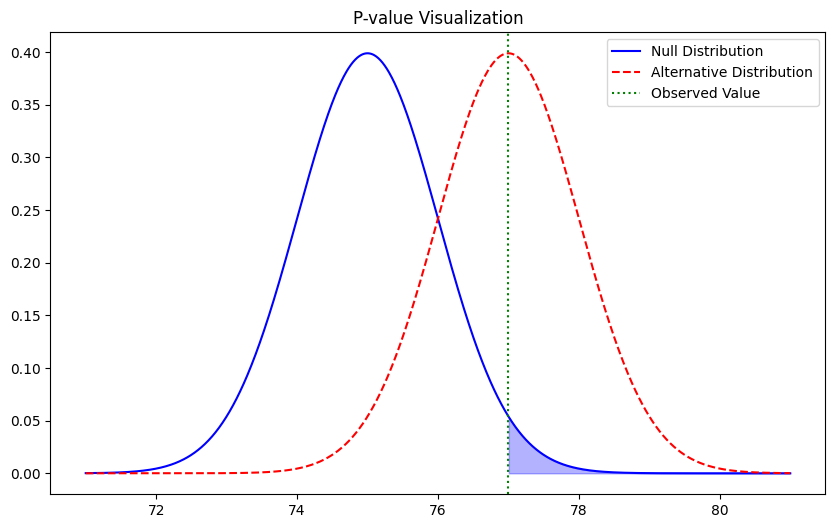

In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

def calculate_pvalue(sample_mean, null_mean, std_dev, n):
    z_score = (sample_mean - null_mean)/(std_dev/np.sqrt(n))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    return z_score, p_value

# Example usage
z, p = calculate_pvalue(77, 75, 6, 36)
print(f"Z-statistic: {z:.2f}")
print(f"P-value: {p:.4f}")

def plot_distributions(null_mean, alt_mean, std_dev):
    x = np.linspace(null_mean-4*std_dev, alt_mean+4*std_dev, 1000)
    null_dist = stats.norm.pdf(x, null_mean, std_dev)
    alt_dist = stats.norm.pdf(x, alt_mean, std_dev)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, null_dist, 'b-', label='Null Distribution')
    plt.plot(x, alt_dist, 'r--', label='Alternative Distribution')
    plt.axvline(x=77, color='g', linestyle=':', label='Observed Value')
    plt.fill_between(x[x >= 77], null_dist[x >= 77], color='blue', alpha=0.3)
    plt.legend()
    plt.title('P-value Visualization')
    plt.show()

plot_distributions(75, 77, 6/np.sqrt(36))

In [7]:
class PValueExample:
    def __init__(self, sample_size=1000):
        self.sample_size = sample_size
        
    def simulate_data(self, true_mean, std_dev):
        """Simulate data and test against null hypothesis"""
        # Generate sample
        data = np.random.normal(true_mean, std_dev, self.sample_size)
        
        # Test against null hypothesis (mean = 0)
        t_stat, p_val = stats.ttest_1samp(data, 0)
        
        return t_stat, p_val
    
    def demonstrate_sample_size_effect(self):
        """Show how p-value changes with sample size"""
        sizes = [10, 100, 1000, 10000]
        results = []
        
        for n in sizes:
            self.sample_size = n
            _, p_val = self.simulate_data(0.1, 1)  # Small effect
            results.append(p_val)
            
        return pd.DataFrame({'Sample Size': sizes, 'P-value': results})

# Usage
example = PValueExample()
results = example.demonstrate_sample_size_effect()
print(results)

   Sample Size       P-value
0           10  1.668145e-01
1          100  6.853917e-01
2         1000  7.771258e-05
3        10000  3.008829e-22


In [8]:
import numpy as np
from scipy import stats

def demonstrate_sample_size_effect(effect_size=0.1, sizes=[10, 100, 1000, 10000]):
    """
    Demonstrate how sample size affects p-value for a fixed effect size
    
    Parameters:
    effect_size: The true difference from null hypothesis
    sizes: List of sample sizes to test
    """
    np.random.seed(42)  # For reproducibility
    results = []
    
    for n in sizes:
        # Generate data with fixed effect size
        data = np.random.normal(loc=effect_size, scale=1, size=n)
        
        # Perform t-test
        t_stat, p_val = stats.ttest_1samp(data, popmean=0)
        
        # Calculate standard error
        std_error = np.std(data, ddof=1)/np.sqrt(n)
        
        results.append({
            'sample_size': n,
            'p_value': p_val,
            'standard_error': std_error,
            't_statistic': t_stat
        })
    
    return results

# Run demonstration
results = demonstrate_sample_size_effect()
for r in results:
    print(f"n={r['sample_size']:5d}: p={r['p_value']:.2e}, SE={r['standard_error']:.4f}")

n=   10: p=4.01e-02, SE=0.2286
n=  100: p=5.53e-01, SE=0.0901
n= 1000: p=2.97e-06, SE=0.0313
n=10000: p=3.88e-19, SE=0.0100
